In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [4]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7

In [8]:
data_train_path = 'train'
data_test_path = 'test'
data_val_path = 'validation'

In [9]:
img_width = 180
img_height =180 

In [10]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [13]:
# finding the class names
data_cat = data_train.class_names
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [14]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [15]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


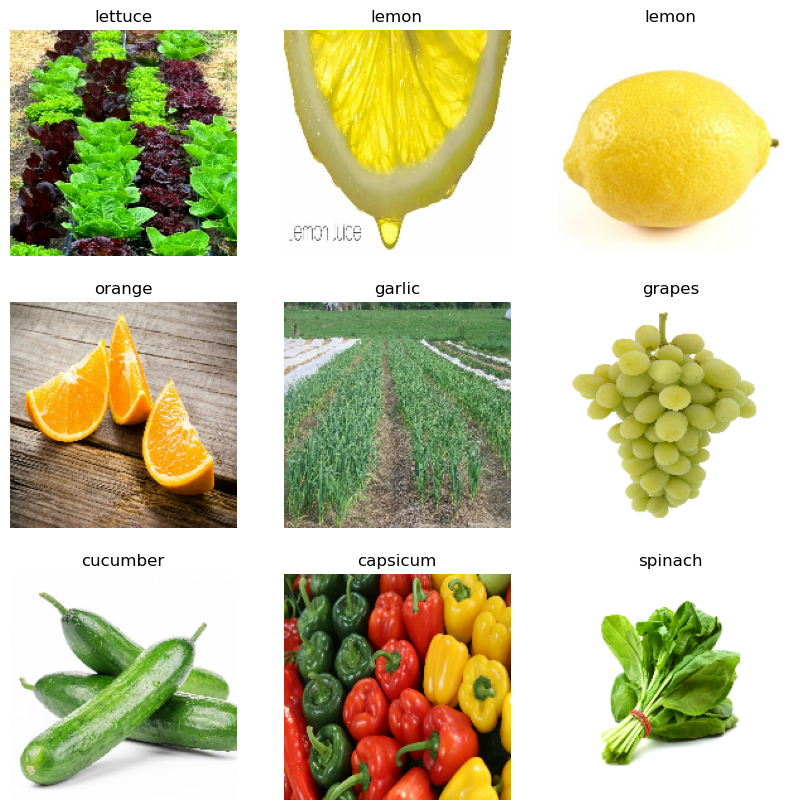

In [16]:
# ploting some images from train dataset
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [17]:
#building the model
from tensorflow.keras.models import Sequential

In [18]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [22]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [23]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [24]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 49s 448ms/step - accuracy: 0.0679 - loss: 3.7738 - val_accuracy: 0.3305 - val_loss: 2.4798
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 371ms/step - accuracy: 0.2571 - loss: 2.6789 - val_accuracy: 0.4786 - val_loss: 1.8058
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 354ms/step - accuracy: 0.3839 - loss: 2.1314 - val_accuracy: 0.6752 - val_loss: 1.2541
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 347ms/step - accuracy: 0.4730 - loss: 1.7336 - val_accuracy: 0.7778 - val_loss: 0.8706
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 372ms/step - accuracy: 0.6334 - loss: 1.2862 - val_accuracy: 0.8832 - val_loss: 0.5185
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 394ms/step - accuracy: 0.7409 - loss: 0.8630 - val_accuracy: 0.9259 - val_loss: 0.3700
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 391ms/step - accuracy: 0.8479 - loss: 0.5074 - val_accuracy: 0.8974 - val_loss: 0.5687
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 428ms/step - accuracy: 0.8845 - loss: 0.3989 - val_accu

Text(0.5, 1.0, 'Loss')

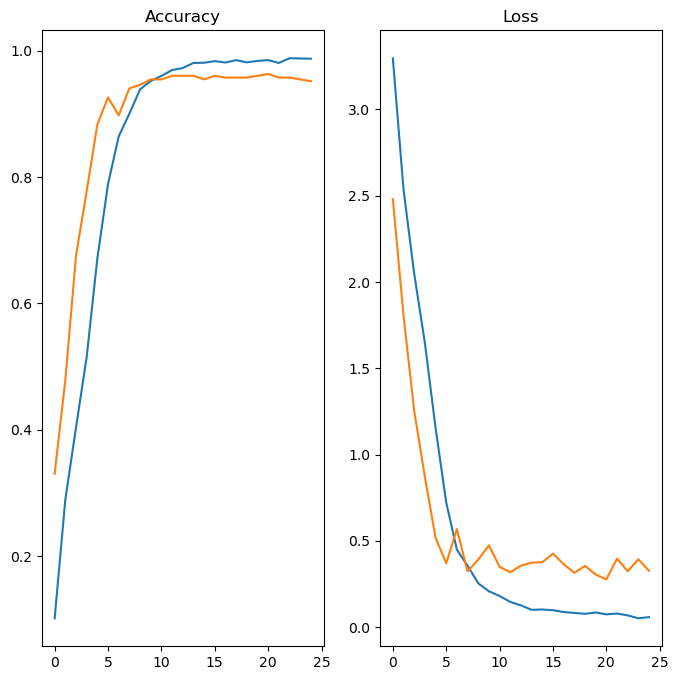

In [25]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [26]:
image = 'image_1.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [27]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


In [28]:
score = tf.nn.softmax(predict)

In [29]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is potato with accuracy of 99.99


In [30]:
model.save('Image_classify.keras')

In [31]:
model.save('Model.h5')


In [33]:
from keras.models import load_model

model1 =load_model('Model.h5')


In [34]:
predict = model1.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


In [35]:
score = tf.nn.softmax(predict)

In [36]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is potato with accuracy of 99.99
